In [ ]:
"""
Proyecto: Puesto de limonada 🍋
Clase: ML Supervisado - Algoritmos de Regresión

Historia:
Tenemos un puesto de limonada y queremos predecir cuántas
limonadas vamos a vender según diferentes condiciones.
"""

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Cargar datos
df = pd.read_csv("../data/raw/ventas_limonada.csv")

# Ver primeras filas
df.head()

📌 Antes de entrenar modelos, entendemos los datos.

In [22]:
# Explorar los datos

df.info()
df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   temperatura    30 non-null     int64
 1   humedad        30 non-null     int64
 2   fin_de_semana  30 non-null     int64
 3   ventas         30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


,temperatura,humedad,fin_de_semana,ventas
count,30.000000,30.000000,30.000000,30.000000
mean,26.000000,50.666667,0.500000,54.000000
std,4.510524,9.907619,0.508548,19.500663
min,18.000000,34.000000,0.000000,22.000000
25%,22.250000,42.500000,0.000000,38.500000
50%,26.000000,50.000000,0.500000,52.000000
75%,29.750000,58.000000,1.000000,66.500000
max,34.000000,70.000000,1.000000,90.000000


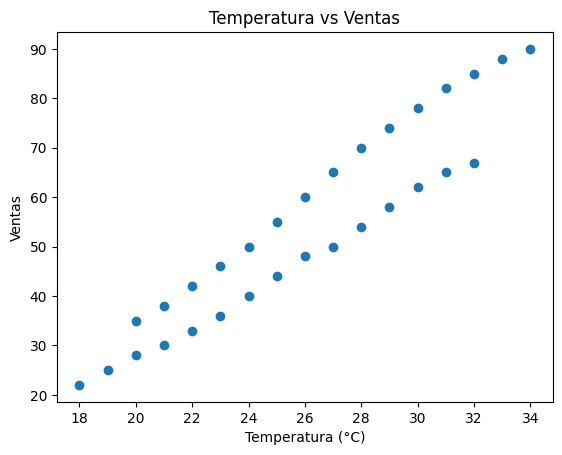

In [23]:
# Visualizar relaciones

plt.scatter(df["temperatura"], df["ventas"])
plt.xlabel("Temperatura (°C)")
plt.ylabel("Ventas")
plt.title("Temperatura vs Ventas")
plt.show()

Regresión lineal simple

In [ ]:
X_simple = df[["temperatura"]]
y = df["ventas"]

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_simple, y)

prediccion = modelo_lineal.predict([[26]])
print("Ventas estimadas a 26°C:", prediccion[0])

Ventas estimadas a 26°C: 54.0


c:\Users\Coder\Documents\Proyectos-Modulo2\ML-Algoritmo-Regresion\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


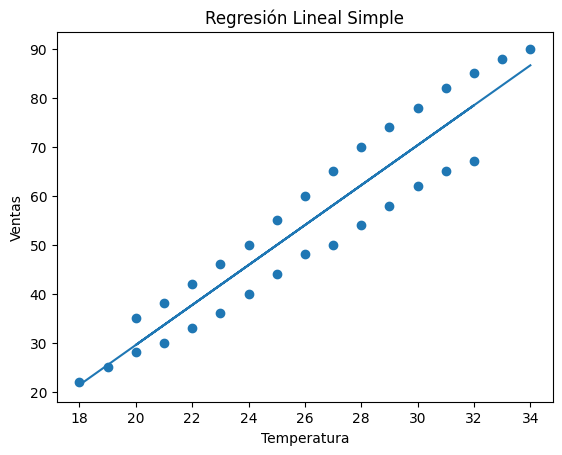

In [ ]:
# Visualizar regresión lineal

plt.scatter(df["temperatura"], y)
plt.plot(df["temperatura"], modelo_lineal.predict(X_simple))
plt.xlabel("Temperatura")
plt.ylabel("Ventas")
plt.title("Regresión Lineal Simple")
plt.show()


Regresión polinómica

In [26]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_simple)

modelo_poly = LinearRegression()
modelo_poly.fit(X_poly, y)

prediccion_poly = modelo_poly.predict(poly.transform([[26]]))
print("Ventas estimadas (polinómica):", prediccion_poly[0])

Ventas estimadas (polinómica): 53.25762582613116


c:\Users\Coder\Documents\Proyectos-Modulo2\ML-Algoritmo-Regresion\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


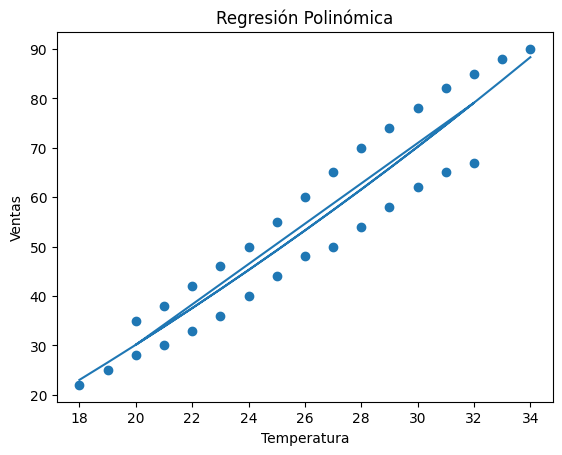

In [27]:
# Visualizar regresión polinómica

plt.scatter(df["temperatura"], y)
plt.plot(df["temperatura"], modelo_poly.predict(X_poly))
plt.xlabel("Temperatura")
plt.ylabel("Ventas")
plt.title("Regresión Polinómica")
plt.show()


Regresión múltiple

In [28]:
# Temperatura + Humedad + Fin de semana

X_multiple = df[["temperatura", "humedad", "fin_de_semana"]]

modelo_multiple = LinearRegression()
modelo_multiple.fit(X_multiple, y)

nuevo_dia = pd.DataFrame({
    "temperatura": [29],
    "humedad": [45],
    "fin_de_semana": [1]
})

prediccion_multiple = modelo_multiple.predict(nuevo_dia)
print("Ventas estimadas (regresión múltiple):", prediccion_multiple[0])

Ventas estimadas (regresión múltiple): 74.26414300736064


In [29]:
# Interpretar el modelo

coeficientes = pd.DataFrame({
    "Variable": X_multiple.columns,
    "Impacto": modelo_multiple.coef_
})

coeficientes

# Positivo → aumenta ventas
# Negativo → reduce ventas

,Variable,Impacto
0,temperatura,8.439117
1,humedad,2.160252
2,fin_de_semana,14.376446


Crear un grafico 3D de Regresion multiple con analisis de 2 variables independentes + 1 variable dependente

c:\Users\Coder\Documents\Proyectos-Modulo2\ML-Algoritmo-Regresion\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


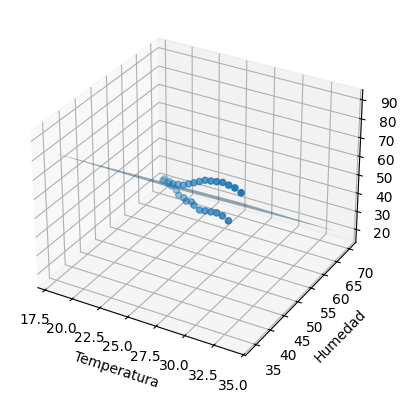

In [ ]:
x_mult = df[["temperatura", "humedad"]]


modelo = LinearRegression()
modelo.fit(x_mult, y)

# Crear valores posibles de temperatura y humedad
temp = np.linspace(df["temperatura"].min(), df["temperatura"].max(), 20)
hum = np.linspace(df["humedad"].min(), df["humedad"].max(), 20)

temp_grid, hum_grid = np.meshgrid(temp, hum)

# El modelo predice ventas para esos valores
ventas_grid = modelo.predict(
    np.c_[temp_grid.ravel(), hum_grid.ravel()]
).reshape(temp_grid.shape)


fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Puntos reales
ax.scatter(
    df["temperatura"],
    df["humedad"],
    df["ventas"]
)

# Plano de regresión
ax.plot_surface(
    temp_grid,
    hum_grid,
    ventas_grid,
    alpha=0.5
)

ax.set_xlabel("Temperatura")
ax.set_ylabel("Humedad")
ax.set_zlabel("Ventas")

plt.show()

In [ ]:
print("""
Conclusiones:
- La regresión predice valores numéricos
- Más variables = modelo más realista
- El modelo aprende SOLO de los datos
- La historia del puesto de limonada nos ayuda a entender ML
""")